# Binary classification using SVM from scratch

# Using SVM algorithm we shall predict whether the cancer is benign or malignant

In [1]:
# Required imports

import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random
from sklearn.preprocessing import StandardScaler as sc # For feature normalization

# Reading the data

In [2]:
data=pd.read_csv('cancer data.csv')

In [3]:
data.head(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


In [4]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

# Data Preprocessing

In [6]:
data.drop(data.columns[[-1, 0]], axis=1, inplace=True)
diagnosis_map = {'M':1, 'B':-1}
data['diagnosis'] = data['diagnosis'].map(diagnosis_map)

In [7]:
data = data.drop(['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','concave points_mean','symmetry_mean','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','smoothness_worst','compactness_worst','compactness_mean','concave points_worst','symmetry_worst','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','concavity_mean'], axis=1)

In [8]:
X = data.drop(['diagnosis'], axis=1).to_numpy()
Y = data['diagnosis'].to_numpy()
X = sc().fit_transform(X)    # Normalizing the data

In [9]:
data.head(20)

,diagnosis,area_worst,concavity_worst
0,1,2019.0,0.7119
1,1,1956.0,0.2416
2,1,1709.0,0.4504
3,1,567.7,0.6869
4,1,1575.0,0.4000
5,1,741.6,0.5355
6,1,1606.0,0.3784
7,1,897.0,0.2678
8,1,739.3,0.5390
9,1,711.4,1.1050


In [10]:
X.shape,Y.shape

((569, 2), (569,))

In [11]:
#X,Y=make_classification(n_classes=2,n_samples=400,n_clusters_per_class=1,random_state=5,n_features=2,n_informative=2,n_redundant=0)
#Y[Y==0]=-1

# Data Visualization

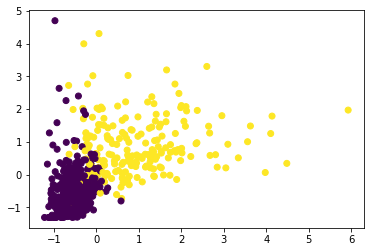

In [12]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [13]:
class SVM:
    def __init__(self,C=6.0):
        self.C=C
        self.W=np.zeros(X_train.shape[1])
        self.b=0
    def hingeloss(self,W,b,X,Y):                             #1/2 w wt + c sigma(max(0,1-ti))   where ti = yi(wt xi + b)
        loss=0.0
        loss+=.5*np.dot(W,W.T)
        for i in range(X.shape[0]):
            ti=Y[i] * (np.dot(W,X[i].T)+b)
            loss += self.C * max(0,1-ti)
        return loss[0][0]
    def fit(self,X,Y,batch_size=100,learning=0.001,epochs=100):
        no_of_features=X.shape[1]
        no_of_samples=X.shape[0]
        n=learning
        c=self.C
        ids=np.arange(no_of_samples)
        np.random.shuffle(ids)
        W=np.zeros((1,no_of_features))
        bias=0
        losses=[]
        for i in range(epochs):
            l=self.hingeloss(W,bias,X,Y)
            losses.append(l)
            for batch_start in range(0,no_of_samples,batch_size):
                gradw=0
                gradb=0
                for j in range(batch_start,batch_start+batch_size):
                    if j<no_of_samples:
                        x=ids[j]
                        ti=Y[x] * (np.dot(W,X[x].T)+bias)
                        if ti>1:
                            gradw+=0
                            gradb+=0
                        else:
                            gradw+=c*Y[x]*Y[x]
                            gradb+=c*Y[x]
                W = W - n*W + n*gradw
                bias = bias + n*gradb
        self.W=W
        self.b=bias
        return self.W,self.b,losses
    

In [14]:
def predict(X,W,b):
    z=b+W[0][0]*X[0][1]*X[:,1]
    yy=sigmoid(z)
    return yy
def sigmoid(z):
    return 1.0/(1+np.exp(-1*z))

# Splitting the data in to train and test

In [15]:
X_train = np.array(X[:250])
y_train = np.array(Y[:250])

X_test = np.array(X[250:])
y_test = np.array(Y[250:])

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((250, 2), (319, 2), (250,), (319,))

# Traning the model

In [17]:
svm=SVM()     #Linear kernel
W,b,losses=svm.fit(X_train,y_train)

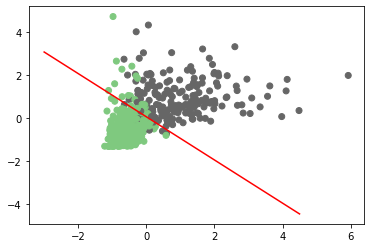

In [18]:
x1=np.linspace(-3,4.5,10)
x2=-(b + W[0][0]*x1)/W[0][1]
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.plot(x1,x2,c="red")
plt.show()

# Testing the model

In [19]:
ypred=predict(X_test,W,b)
ypred[ypred>0.5] = 1
ypred[ypred<=0.5]= -1

In [20]:
ypred

array([ 1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,
       -1.,  1.,  1., -1., -1., -1., -1., -1., -1.,  1., -1., -1., -1.,
       -1., -1., -1., -1.,  1., -1.,  1.,  1.,  1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1., -1.,
        1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1.,  1.,  1., -1., -1., -1., -1.,  1., -1., -1., -1., -1.,
        1.,  1.,  1.,  1., -1., -1., -1.,  1., -1.,  1., -1.,  1.,  1.,
        1., -1.,  1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,
       -1.,  1.,  1.,  1., -1.,  1.,  1., -1., -1.,  1., -1., -1.,  1.,
       -1., -1.,  1.,  1.,  1., -1.,  1., -1.,  1.,  1., -1., -1.,  1.,
        1., -1., -1.,  1., -1., -1., -1.,  1., -1., -1., -1., -1., -1.,
       -1., -1.,  1., -1., -1., -1., -1.,  1., -1., -1., -1.,  1., -1.,
       -1., -1.,  1., -1.,  1., -1., -1.,  1., -1., -1., -1.,  1

In [21]:
correct=0
for i in range(len(ypred)):
    if(ypred[i]==y_test[i]):
        correct+=1
    else:
        pass
accuracy=correct/len(ypred)
accuracy

0.8495297805642633